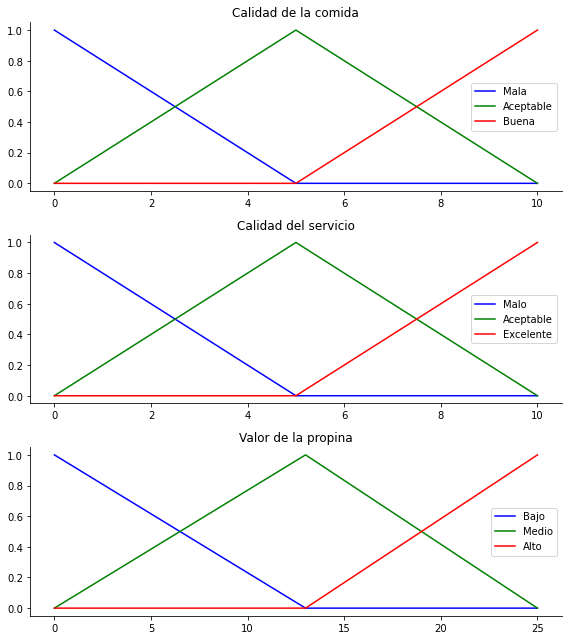

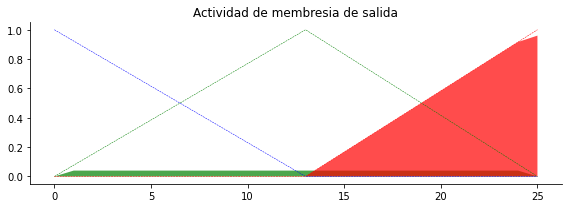

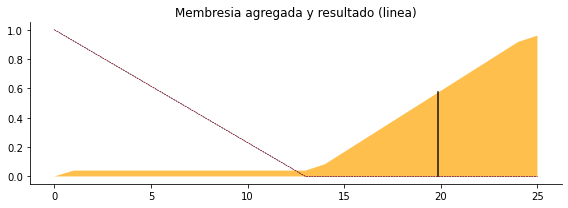

In [3]:
#CONTROL DIFUSO

#Encontrar vaLor de La propina a partir de La caLidad deL 
#servicio y de La comida en un restaurante

#Importar Librerías 
import numpy as np 
import skfuzzy as fuzz 
import matplotlib.pyplot as plt

#Generar variabLes deL universo 
# * CaLidad y servicio en rangos subjetivos [0, 10] 
# *   La   propina   tiene   un   rango   de   [0,   25]   en   unidades   de   puntos   porcentuaLes 
x_calidad = np.arange(0, 11, 1) 
x_servicio = np.arange(0, 11, 1) 
x_propina = np.arange(0, 26, 1) 

#Generar funciones de pertenencia difusas 
calidad_baja = fuzz.trimf(x_calidad, [0, 0, 5]) 
calidad_media = fuzz.trimf(x_calidad, [0, 5, 10]) 
calidad_alta = fuzz.trimf(x_calidad, [5, 10, 10]) 
servicio_bajo = fuzz.trimf(x_servicio, [0, 0, 5]) 
servicio_medio = fuzz.trimf(x_servicio, [0, 5, 10]) 
servicio_alto = fuzz.trimf(x_servicio, [5, 10, 10]) 
propina_baja = fuzz.trimf(x_propina, [0, 0, 13]) 
propina_media = fuzz.trimf(x_propina, [0, 13, 25]) 
propina_alta = fuzz.trimf(x_propina, [13, 25, 25])

#VisuaLizar estos universos y funciones de pertenencia. 
fig, (ax0, axl, ax2) = plt.subplots(nrows=3, figsize=(8, 9)) 
ax0.plot(x_calidad, calidad_baja, 'b', linewidth=1.5, label='Mala') 
ax0.plot(x_calidad, calidad_media, 'g', linewidth=1.5, label='Aceptable') 
ax0.plot(x_calidad, calidad_alta, 'r', linewidth=1.5, label='Buena') 
ax0.set_title('Calidad de la comida') 
ax0.legend()
              
axl.plot(x_servicio, servicio_bajo, 'b', linewidth=1.5, label='Malo') 
axl.plot(x_servicio, servicio_medio, 'g', linewidth=1.5, label='Aceptable') 
axl.plot(x_servicio, servicio_alto, 'r', linewidth=1.5, label='Excelente') 
axl.set_title('Calidad del servicio') 
axl.legend()
              
ax2.plot(x_propina, propina_baja, 'b', linewidth=1.5, label='Bajo') 
ax2.plot(x_propina, propina_media, 'g', linewidth=1.5, label='Medio') 
ax2.plot(x_propina, propina_alta, 'r', linewidth=1.5, label='Alto') 
ax2.set_title('Valor de la propina') 
ax2.legend()

#OcuLtar Los ejes superior / derecho 
for ax in (ax0, axl, ax2): 
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False) 
    ax.get_xaxis().tick_bottom() 
    ax.get_yaxis().tick_left() 
plt.tight_layout()

# Necesitamos La activacion de nuestras funciones de pertenencia difusa en estos vaLores.
# Los vaLores exactos 6.5 y 9.8 no existen en nuestros universos
# !Para esto existe fuzz.interp_membership!
nivel_calidad_bajo = fuzz.interp_membership(x_calidad, calidad_baja, 6.5)
nivel_calidad_medio = fuzz.interp_membership(x_calidad, calidad_media, 6.5)
nivel_calidad_alto = fuzz.interp_membership(x_calidad, calidad_alta, 6.5)
nivel_servicio_bajo = fuzz.interp_membership(x_servicio, servicio_bajo, 9.8)
nivel_servicio_medio = fuzz.interp_membership(x_servicio, servicio_medio, 9.8)
nivel_servicio_alto = fuzz.interp_membership(x_servicio, servicio_alto, 9.8)

# Ahora tomamos nuestras regLas y Las apLicamos. La regLa 1 se refiere a La maLa comida o servicic
# EL operador OR significa que tomamos eL moximo de estos dos.
activar_regla1 = np.fmax(nivel_calidad_bajo, nivel_servicio_bajo)

# Ahora apLicamos esto recortondo La parte superior de La saLida correspondiente
# funcion de membresia con 'np.fmin'
activacion_propina_baja = np.fmin(activar_regla1, propina_baja) # eLiminado por compLeto a 0

# Para La regLa 2, conectamos un servicio aceptabLe con una propina media.
activacion_propina_media = np.fmin(nivel_servicio_medio, propina_media)

# Para La regta 3, conectamos servicio bueno o comida buena con propinas altos
activar_regla3 = np.fmax(nivel_calidad_alto, nivel_servicio_alto)
activacion_propina_alta = np.fmin(activar_regla3, propina_alta)
propina0 = np.zeros_like(x_propina)

# visuaLizar to anterior
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.fill_between(x_propina, propina0, activacion_propina_baja, facecolor='b', alpha=0.7)
ax0.plot(x_propina, propina_baja, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_propina, propina0, activacion_propina_media, facecolor='g', alpha=0.7)
ax0.plot(x_propina, propina_media, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_propina, propina0, activacion_propina_alta, facecolor='r', alpha=0.7)
ax0.plot(x_propina, propina_alta, 'r', linewidth=0.51, linestyle='--')
ax0.set_title('Actividad de membresia de salida')

# CanceLar Los ejes superior / derecho
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    plt.tight_layout()

# Agregar Las tres funciones de pertenencia de saLida juntas
agregado = np.fmax(activacion_propina_baja,
np.fmax(activacion_propina_media, activacion_propina_alta))

# CaLcuLar eL resultado difuso
propina = fuzz.defuzz(x_propina, agregado, 'centroid')
activacion_propina = fuzz.interp_membership(x_propina, agregado, propina) # Para dibujar

# VisuaLizar Lo anterior
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(x_propina, propina_baja, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_propina, propina_baja, 'g', linewidth=0.5, linestyle='--', )
ax0.plot(x_propina, propina_baja, 'r', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_propina, propina0, agregado, facecolor='Orange', alpha=0.7)
ax0.plot([propina, propina], [0, activacion_propina], 'k', linewidth=1.51, alpha=0.9)
ax0.set_title('Membresia agregada y resultado (linea)')

# CanceLa Los ejes superior / derecho
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

    